In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

banco.avif


**PROYECTO PARA FIDELIZACIÓN DE CLIENTES "APEX BANK"**

RESUMEN: el presente proyecto fue encargado por la Gerencia Comercial de Apex Bank con la intención de aumentar la tasa de fidelización de la cartera de clientes, elaborando políticas de retención especialmente direccionadas a aquellos clientes que se considera tendrán una menor probabilidad de abandonar el banco.

CONTEXTO COMERCIAL: Apex Bank le encargo al departamento de "Data Sciencie & Analytics" el análisis de una muestra reducida de su cartera de clientes. Para definir la muestra se ha optado por aquellos países en donde el banco tiene una fuerte presencia, pero que de acuerdo a los últimos informes recibidos de cada región, se puede observar una reducción en los ingresos financieros. La Gerencia Comercial quiere poder anticipar el abandono de clientes, para de esta forma dirigir a ellos políticas de fidelización (tales como promociones, descuentos, beneficios y productos adicionales), para de esta forma recomponer los ingresos regionales.

En una etapa inicial, se ha solicitado al Banco que nos provea información respecto a la cartera de clientes de aquellos países con mayores tasas de perdida de cartera de clientes que afectan de forma directa a los ingresos del banco. Las características o variables de dicha cartera de encuenta detallada en el presente trabajo en la sección de composición del dataset.

Se procedió a realizar un análisis explotario de los datos con la intención de obtener información relevante respecto a la composición de la cartera de clientes y ver si había relaciones líneales que pudieran observarse respecto al por qué de la decisión de algunos clientes de abandonar el banco.

Fue necesario abordar una serie de hipótesis, las cuales se resumen a continuación:

1- ¿Existe una relación directa entre la residencia del cliente y su decisión o no de permanecer como cliente del banco?
2- ¿Existe una relación directa entre el género del cliente y su decisión o no de permanecer como cliente del banco?
3- ¿Existe algún tipo de relación entre cada variable individualmente con la intención de abandonar el banco?

Del análisis realizado, se pudo observar que la tasa de abandono es superior en Alemania, pero que no había relación entre el género del cliente y su decisión de dejar el banco. Tampoco pudo observarse una relación lineal directa entre la tasa de abandono y la antigüedad de cada cliente, o entre la tasa de abandono y el saldo en la cuenta bancaria.
No se observaron datos nulos o faltantes, ni datos outliers relevantes.



---



# **1 - ANÁLISIS EXPLOTARIO DE DATOS (EDA)**

# **Descripción del dataset**

---

RowNumber: número de filas del 1 al 10.000.

CustomerId: código de identificación único para cada cliente adignado por el banco.

Surname: apellido del cliente.

CreditScore: puntaje de crédito del cliente. Tiene un rango de 300 a 850.

Geography: país de residencia del cliente.

Gender: género del cliente.

Age: edad del cliente (years)

Tenure: cantidad de años que el cliente está en el banco.

Balance: saldo bancario del cliente. (Euros)

NumOfProducts: número de productos que el cliente tiene contratados con el banco.

HasCrCard: indica si el cliente tiene una tarjeta de crédito con el banco (0= N=, 1 = SI)

IsActiveMember: indica si el cliente es considerado miembro activo.

EstimatedSalary: sueldo anual estimado del cliente (Euros)

Exited: indica si el cliente ha dejado el banco (0= NO, 1 = SI)


In [2]:

url="https://raw.githubusercontent.com/javierbarbera/DataScience_Parte2/main/Churn_Modelling.csv"
df= pd.read_csv(url,sep=',')
df



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis =1, inplace=True)

Limpieza del dataset, prescindiendo de aquellas variables que tienen una incidencia nula en la variable objetivo.

In [4]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Exited'].value_counts(normalize=True) * 100

,proportion
Exited,
0,79.63
1,20.37


En terminos de la variable objetivo, el dataset se encuentra desbalanceado, siendo predominante en casi un 80% los clientes que eligen permanecer en el banco.

In [7]:
df = df.astype({"Geography":"category","Gender":"category" })

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.describe(include="category")

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [11]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [17]:
df.duplicated()
cantidad_de_duplicados = df.duplicated().sum()
f"Cantidad de duplicados: {cantidad_de_duplicados}"

'Cantidad de duplicados: 0'



---



# **ABANDONO POR PAÍS:**

---
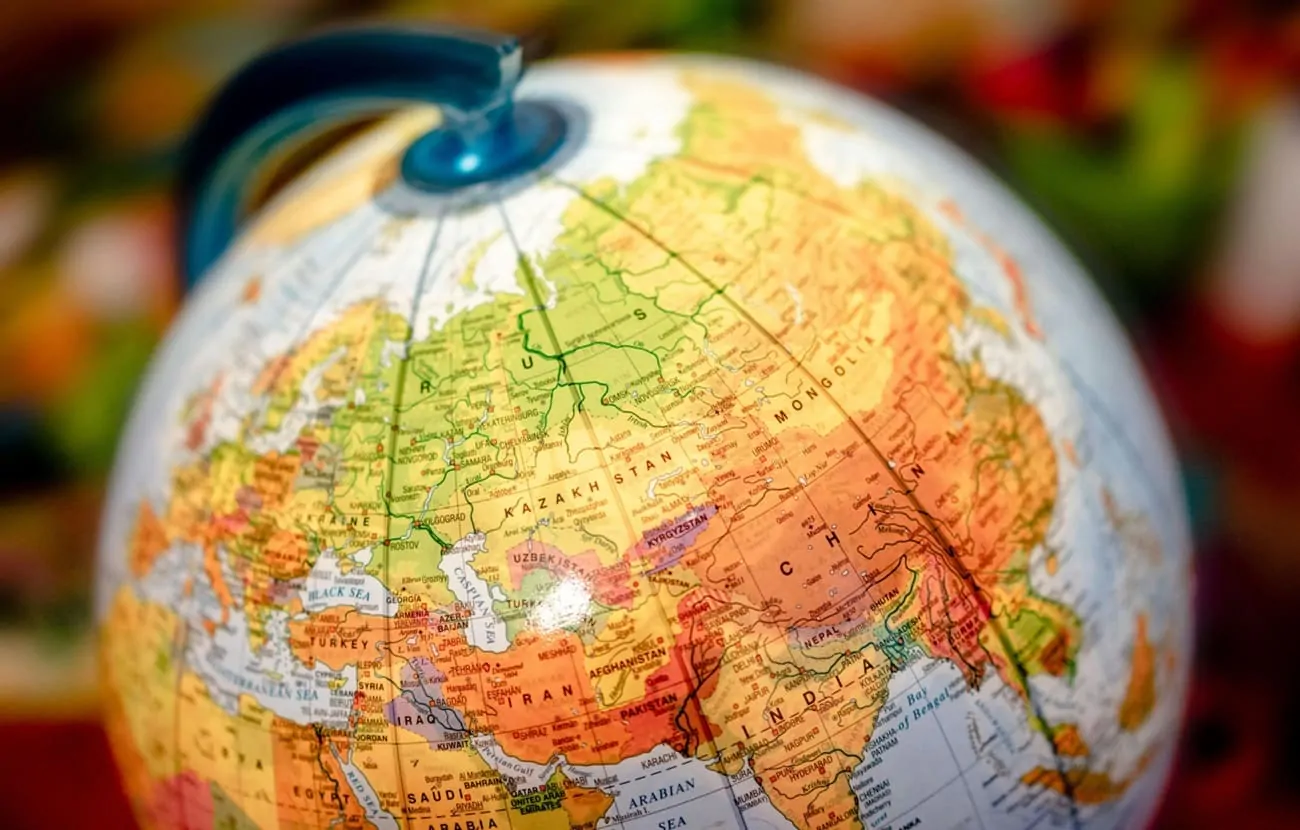


In [18]:
df_pais = df.value_counts(["Geography"])
print(f"Composición del dataset por país: ")
df_pais

Composición del dataset por país: 


,count
Geography,
France,5014
Germany,2509
Spain,2477


In [19]:
df_pais = df.value_counts(["Geography"],normalize=True)*100
df_pais

,proportion
Geography,
France,50.14
Germany,25.09
Spain,24.77


In [20]:
df_abandono = df.value_counts(["Exited"])
df_abandono

,count
Exited,
0,7963
1,2037


In [21]:
df_abandono_porpais = df[df["Exited"] == 1]
df_abandono_porpais.value_counts("Geography", normalize = True) *100

,proportion
Geography,
Germany,39.960727
France,39.764359
Spain,20.274914


In [24]:
abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()
abandono_por_pais['Totales'] = abandono_por_pais[1] + abandono_por_pais[0]
abandono_por_pais.rename(columns = {0: "No abandonaron", 1:"Abandonaron"}, inplace= True)
abandono_por_pais['Tasa de abandono'] = abandono_por_pais["Abandonaron"] / abandono_por_pais["Totales"]
total = abandono_por_pais[["Abandonaron","No abandonaron","Totales"]].sum()
abandono_por_pais.loc['Total'] = total
abandono_por_pais

<ipython-input-24-d7874aa0a5a1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()


Exited,No abandonaron,Abandonaron,Totales,Tasa de abandono
Geography,,,,
France,4204.0,810.0,5014.0,0.161548
Germany,1695.0,814.0,2509.0,0.324432
Spain,2064.0,413.0,2477.0,0.166734
Total,7963.0,2037.0,10000.0,NaN


<ipython-input-25-ea3c66085d1b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()


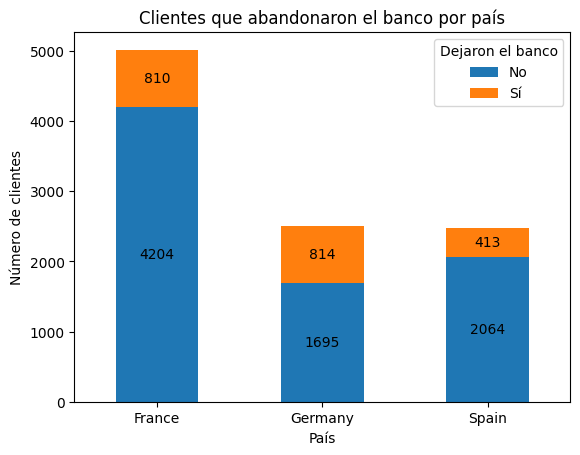

In [25]:
abandono_por_pais = df.groupby(['Geography', 'Exited']).size().unstack()
ax = abandono_por_pais.plot(kind='bar', stacked=True)
plt.title('Clientes que abandonaron el banco por país')
plt.xlabel('País')
plt.ylabel('Número de clientes')
plt.legend(title='Dejaron el banco', labels=['No', 'Sí'])
plt.xticks(rotation=0)
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.show()

Se realizaron una serie de análisis que incluyó la creación de tablas y gráficos para analizar qué relación existe entre el país de residencia de cada cliente y la tasa de abandono.

Se puede observar que España es el país con menor cantidad de clientes con abandono, siendo Francia y Alemania los que tienen mayor cantidad de clientes que dejaron el banco.

Pero hay que tener presente que entre estos dos últimos, la cantidad de clientes totales en Francia duplican a la cantidad de clientes en Alemania, por lo que decir que la tasa de abandono es similar en ambos países sería incorrecto, ya que Alemania tiene la mitad de clientes que Francia e igual cantidad de abandono.

Por lo tanto la tasa alemana de abandono respecto a los clientes totales es mayor que la de los otros dos países.

---



# **ABANDONO POR GENERO:**
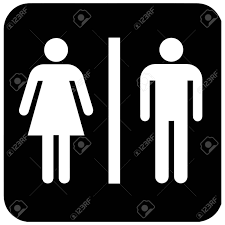
---

In [26]:
df_genero = df.value_counts(["Gender"])
print(f"Composición del dataset por genero: ")
df_genero

Composición del dataset por genero: 


,count
Gender,
Male,5457
Female,4543


In [27]:
df_genero = df.value_counts(["Gender"], normalize=True)*100
df_genero

,proportion
Gender,
Male,54.57
Female,45.43


In [28]:
df_abandono = df[df["Exited"] == 1]
df_abandono.value_counts("Gender", normalize = True) *100

,proportion
Gender,
Female,55.915562
Male,44.084438


In [29]:
abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()
abandono_por_genero.rename(columns = {0: "No abandonaron", 1:"Abandonaron"},inplace= True)
total = abandono_por_genero[["Abandonaron","No abandonaron"]].sum()
abandono_por_genero.loc['Total'] = total
abandono_por_genero

<ipython-input-29-2127f4dd7738>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()


Exited,No abandonaron,Abandonaron
Gender,,
Female,3404,1139
Male,4559,898
Total,7963,2037


<ipython-input-34-dfd6b3052310>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()


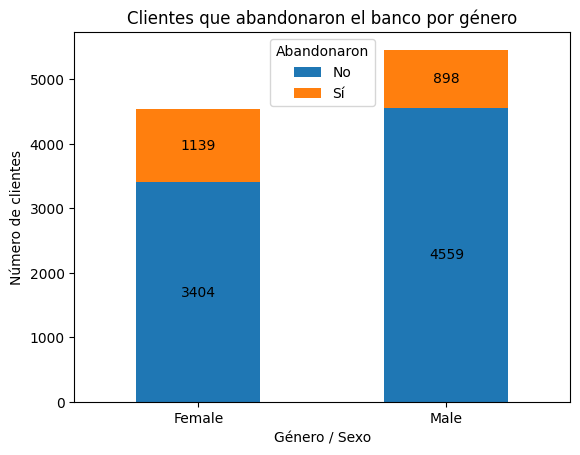

In [34]:
abandono_por_genero = df.groupby(['Gender', 'Exited']).size().unstack()
ax = abandono_por_genero.plot(kind='bar', stacked=True)
plt.title('Clientes que abandonaron el banco por género')
plt.xlabel('Género / Sexo')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.legend(title='Abandonaron', labels=['No', 'Sí'], loc='upper center')
for container in ax.containers:
    ax.bar_label(container, label_type='center')
plt.show()

In [35]:
abandono_por_genero['Totales'] = abandono_por_genero[1] + abandono_por_genero[0]
abandono_por_genero.rename(columns = {0: "No abandonaron", 1:"Abandonaron"},inplace= True)
abandono_por_genero['Tasa de abandono'] = abandono_por_genero["Abandonaron"] / abandono_por_genero["Totales"]
total = abandono_por_genero[["Abandonaron","No abandonaron","Totales"]].sum()
abandono_por_genero.loc['Total'] = total
abandono_por_genero

Exited,No abandonaron,Abandonaron,Totales,Tasa de abandono
Gender,,,,
Female,3404.0,1139.0,4543.0,0.250715
Male,4559.0,898.0,5457.0,0.164559
Total,7963.0,2037.0,10000.0,NaN


De los datos revisados, se puede ver que la distribución por género del dataset es bastante equilibrada, siendo que el 54,5% son hombres y el 45,5% mujeres. Ahora bien, filtrando solamente por quienes abandonaron el banco, el 55,9 son mujeres y el 44,1 restante son hombres (se invierte la tendencia del dataset completo).

Tanto en el gráfico como en la última tabla, se puede observar que la tasa de abandono de mujeres es mayor a la de los hombres, entiendendose dicha tasa como la proporción entre la cantidad de abandonos por género dividido los clientes totales por género.

---



# **RELACIÓN ENTRE VARIABLES Y VARIABLE TARGET U OBJETIVO**

---



In [37]:
variables_categoricas = ['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard','IsActiveMember']
variables_continuas =  ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

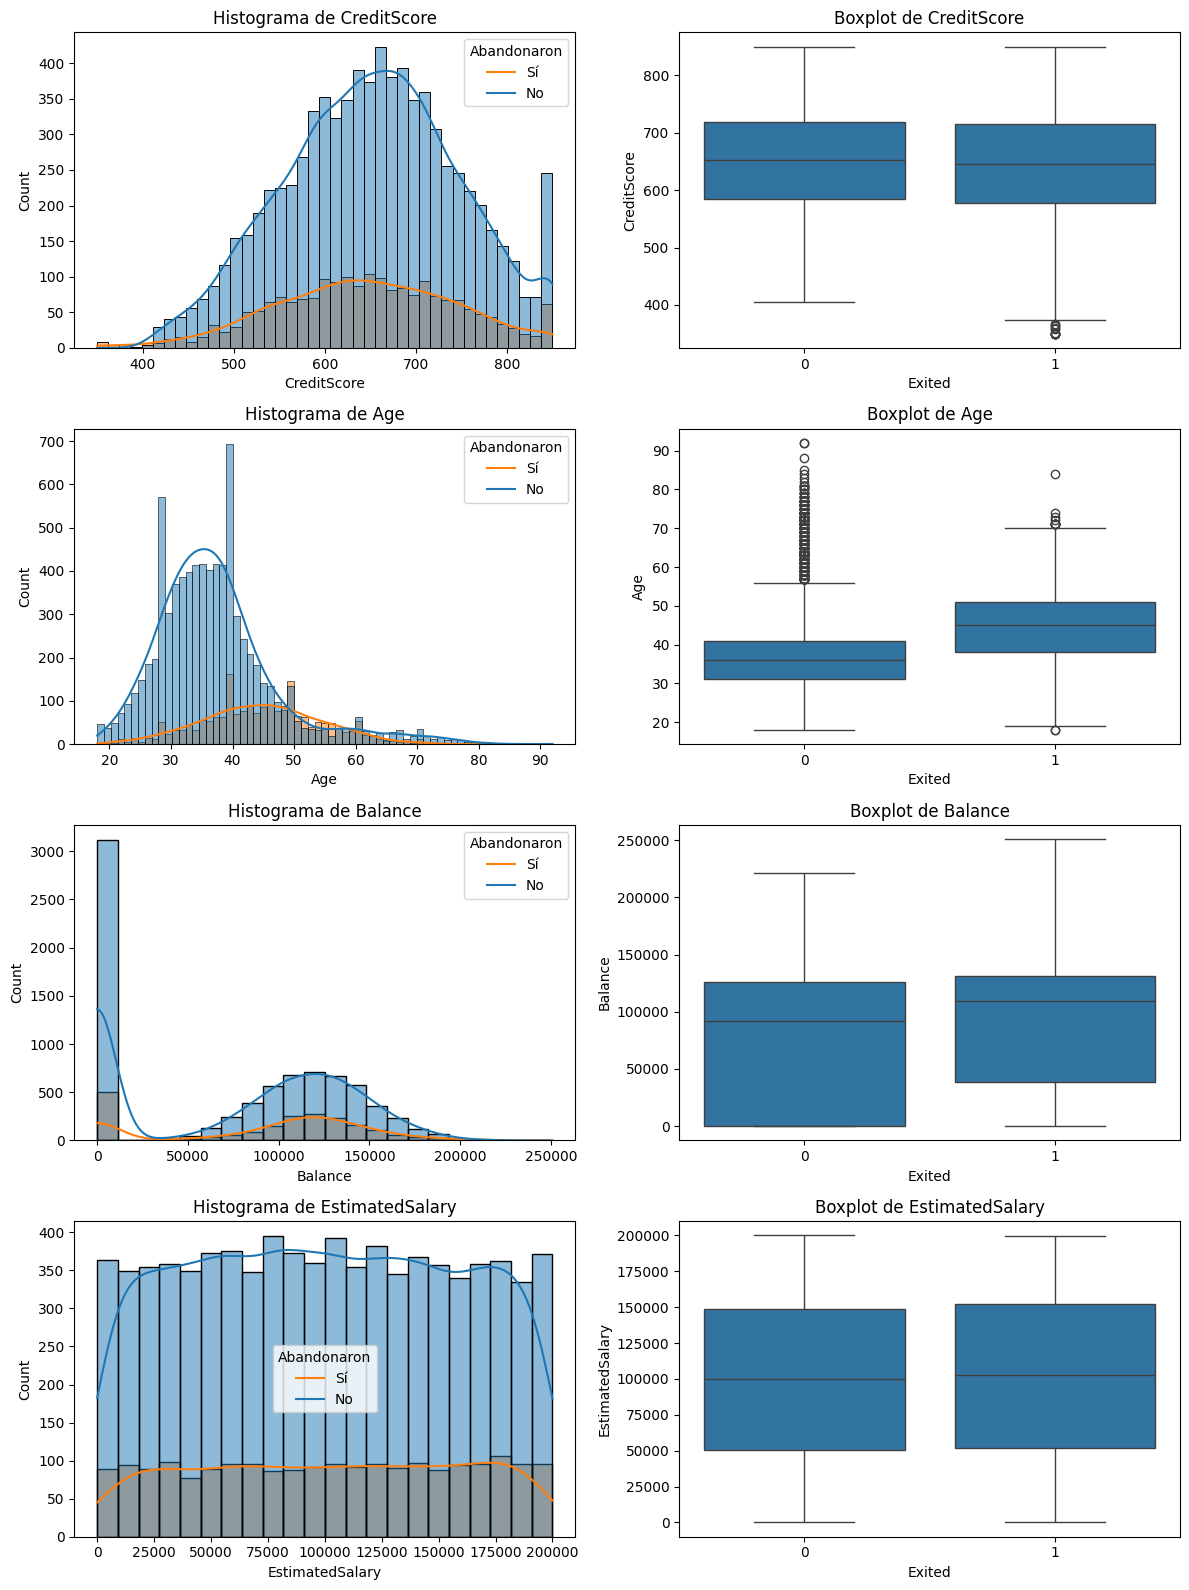

In [38]:
fig, axes = plt.subplots(len(variables_continuas), 2, figsize=(12, len(variables_continuas) * 4))

for i, var in enumerate(variables_continuas):
    sns.histplot(data=df, x=var, hue='Exited', ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histograma de {var}')
    axes[i, 0].legend(title='Abandonaron', labels=['Sí', 'No'])


    sns.boxplot(data=df, x='Exited', y=var, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot de {var}')

plt.tight_layout()

plt.show()

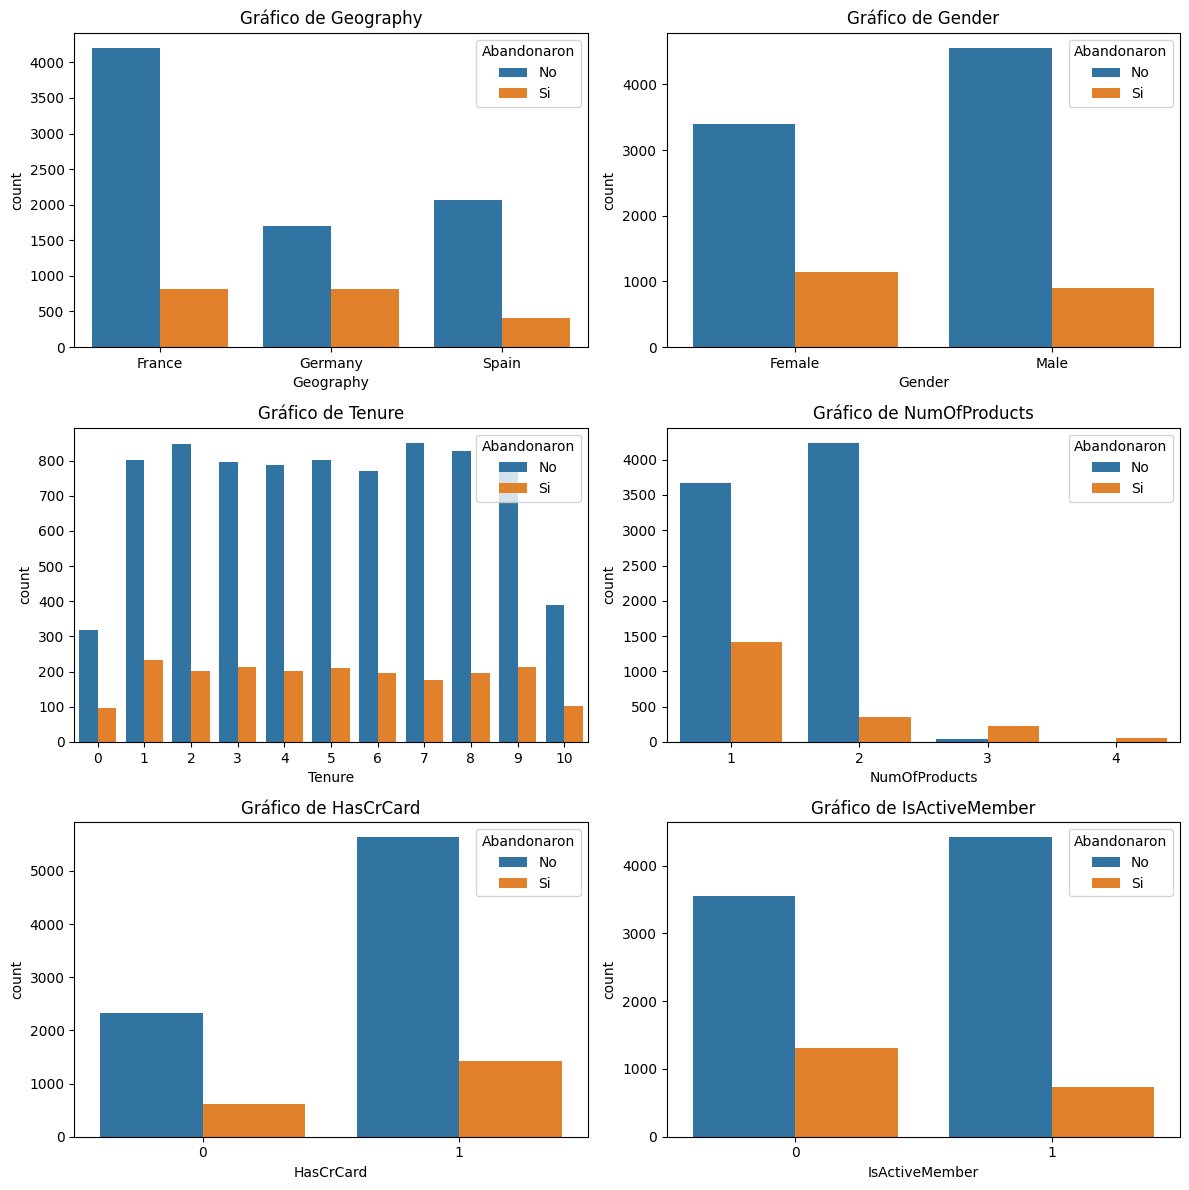

In [39]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

for i, var in enumerate(variables_categoricas):
    row, col = divmod(i, 2)
    sns.countplot(data=df, x=var, hue='Exited', ax=axes[row, col])
    axes[row, col].set_title(f'Gráfico de {var}')
    axes[row, col].legend(title='Abandonaron', labels=['No', 'Si'])



plt.tight_layout()

plt.show()

CONCLUSIONES:

CreditScore: la distribución del credit score pareciera tener una distribución normal, concentrandose la mayoría de casos alrededor de la media.

Age: la distribución indica preponderancia de gente menor a 50 años, concentrándose el abandono en clientes de entre 40 y 60 años.

Tenure: la distribución de la antiguedad está básicamente aplanada, es decir, la antiguedad de 0 a 10 años está balanceada a lo largo del dataset.

Balance: se puede observar una predominancia de clientes con saldos en sus cuentas bancarias por debajo de los 50.000 euros, y por consiguiente, son los que revisen mayor índice de abandono. Podría decirse como contrapunto, que los clientes con saldos en cuantas bancarias en los rangos más altos, tienen mayor probabilidad de quedarse en el banco.

NumOfProducts: el dataset muestra una preponderancia de clientes con 1 o 2 productos, siendo casi nulo aquellos clientes con 3 o más. Pero proporcionalmente, en clientes con 3 o más productos, hay un mayor abandono (no en términos nominales)

HasCrCard: se puede inferir que aquellos clientes con tarjetas de crédito tienen mayor probabilidad de abandonar el banco.

IsActiveMember: se puede inferir que aquellos clientes no activos tienen mayor probabilidad de abandonar el banco.

EstimatedSalary: la distribución de clientes en base al salario estimado es una distribución sumamente pareja. Si bien el salario anual estimado va desde el 0.00 a 200.000 euros, la cantidad de clientes en cada segmento es constante en todo el dataset. A su vez, el abandono teniendo en cuenta está variable pareciera ser constante, por lo que no tendría una relevancia significativa en la variable target u objetivo.

Geography: se puede observar que España es el país con menor cantidad de clientes con abandono, siendo Francia y Alemania los que tienen mayor cantidad de clientes que dejaron el banco.
Pero hay que tener presente que entre estos dos últimos, la cantidad de clientes totales en Francia duplican a la cantidad de clientes en Alemania, por lo que decir que la tasa de abandono es similar en ambos países sería incorrecto, ya que Alemania tiene la mitad de clientes que Francia e igual cantidad de abandono.
Por lo tanto la tasa alemana de abandono respecto a los clientes totales es mayor que la de los otros dos países.

Gender: de los datos revisados, se puede ver que la distribución por género del dataset es bastante equilibrada, siendo que el 54,5% son hombres y el 45,5% mujeres. Ahora bien, filtrando solamente por quienes abandonaron el banco, el 55,9 son mujeres y el 44,1 restante son hombres (se invierte la tendencia del dataset completo).
Se puede observar que la tasa de abandono de mujeres es mayor a la de los hombres, entiendendose dicha tasa como la proporción entre la cantidad de abandonos por género dividido los clientes totales por género.

---



# **ANÁLISIS DE VALORES ATÍPICOS (OUTLIERS):**

---



Surge del análisis gráfico realizado arriba mediante los boxplots que las variables "AGE" y "CREDITSCORE" presentan algunos valores atípicos. La intención del presente apartado será identificar si aquellos valores atípicos deben considerarse datos inválidos (por lo tanto, no ser considerados dentro del dataset) o si los mismos, tomando en cuenta el contexto del dataset en general, deben ser considerados válidos.

AGE

In [40]:
df_age = df["Age" ]
q1 = np.percentile(df_age,25)
q3 = np.percentile(df_age,75)
iqr = q3 - q1
q1


32.0

In [41]:
iqr

12.0

In [42]:
limite_inferior = q1 - 1.5 *iqr
limite_superior = q3 + 1.5 *iqr

In [43]:
atipicos = df_age[(df_age < limite_inferior) | (df_age > limite_superior)]
atipicos.sort_values(ascending=True)


,Age
769,63
8562,63
2053,63
2078,63
6410,63
8207,63
5038,63
963,63
7813,63
7802,63


CREDITSCORE

In [47]:
df_credit = df["CreditScore" ]
q1 = np.percentile(df_credit,25)
q3 = np.percentile(df_credit,75)
iqr = q3 - q1

In [48]:
limite_inferior = q1 - 1.5 *iqr
limite_superior = q3 + 1.5 *iqr

In [49]:
atipicos_credit = df_credit[(df_credit < limite_inferior) | (df_credit > limite_superior)]
atipicos_credit.sort_values(ascending=True)

,CreditScore
1631,350
1838,350
8723,350
8762,350
9624,350
2473,351
1962,358
1405,359
1193,363
2579,365


Del análisis de valores atípicos, puede inferirse que los mismos responden a las características propias del dataset, pero no son valores que deban eliminarse del mismo.

En el caso de la variable edad, hay una gran cantidad de clientes de edad superior a los 63 años, pero no se detectaron valores absurdos, como podría ser edades superiores a los 100 años (por su poca frecuencia dada la expectativa de vida del ser humano) o inferiores a los 16/18 años (edades mínima permitida para poder abrir una cuenta bancaria).

En el caso de la variable CreditScore tampoco amerita eliminar los valores atípicos ya que no implican valores absurdos y están alineados con el rango de valores establecido por el banco.

---



# **MATRIZ DE CORRELACIÓN:**

Se analizará de forma gráfica mediante un mapa de calor si existe una relación medianamente fuerte entre las distintas varibles del dataset.

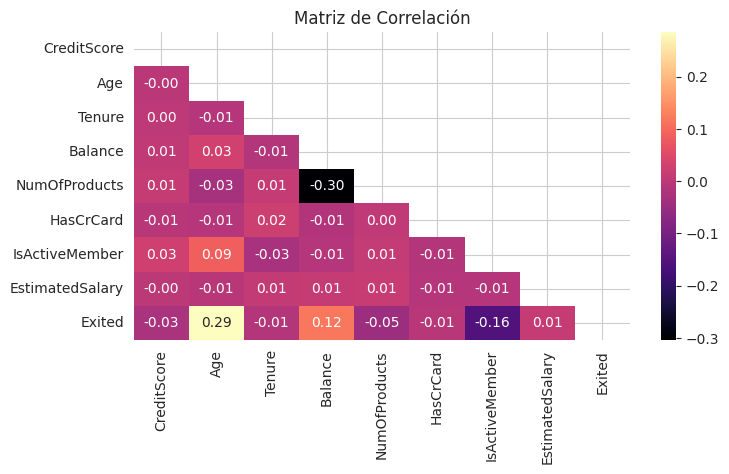

In [52]:
variables_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

correlation_matrix = df[variables_numericas].corr()
sns.set_style("whitegrid")
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f", mask=mask)
plt.title("Matriz de Correlación")
plt.show()



---



CONCLUSIONES:

AGE - EXITED: hay una correlación algo débil entre la edad de los clientes y su probabilidad de abandono, indicando una mayor probabilidad de abandono en clientes de edades más avanzadas (por encima de los 40 años)  (0,29)

BALANCE - NumOfProducts : existe una leve correlación negativa entre estas dos variables, indicando que a mayor cantidad de productos del cliente, tiene un menor saldo en la cuenta bancaria. (-0,30)

IsActiveMember -EXITED: hay una muy leve correlación negativa, indicando que los miembros activos son los menos propensos a abandonar el banco. (-0,16)

BALANCE - EXITED: una muy mínima correlación positiva, indicando que a mayor saldo en la cuenta bancaria, mayor probabilidad de abandono.

---



# **CREACIÓN DE ATRIBUTOS (FEATURE ENGINEERING)**

Tomando las dos variables que responden a valores de índole monetaria, primero ordenaremos cada una de ellas para poder visualizar mínimos y máximos para luego poder ordenarlas por rangos. Para los rangos de "EstimatedSalary" y "Balance" se crearán dos nuevas variables categóricas.

In [53]:
df.sort_values("EstimatedSalary", ascending=True).head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1
9647,625,France,Male,31,5,0.00,2,0,1,90.07,0
9010,645,Germany,Female,59,8,121669.93,2,0,0,91.75,1
5548,710,France,Male,38,2,0.00,2,1,0,96.27,0
4989,629,France,Male,40,9,0.00,1,1,0,106.67,0
7565,708,France,Male,52,10,105355.81,1,1,0,123.07,1
2498,718,France,Male,37,8,0.00,2,1,1,142.81,0
8722,621,France,Male,35,7,87619.29,1,1,0,143.34,0
4774,811,France,Female,35,7,0.00,1,1,1,178.19,0
1451,551,France,Female,38,10,0.00,2,1,1,216.27,0


In [54]:
df.sort_values("EstimatedSalary", ascending=False).head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6646,685,Spain,Female,42,2,0.00,2,0,0,199992.48,0
3580,639,Germany,Female,41,5,98635.77,1,1,0,199970.74,0
4417,608,Spain,Male,27,4,153325.10,1,1,1,199953.33,0
9096,569,France,Male,37,9,178755.84,1,1,0,199929.17,0
8926,620,France,Male,28,8,0.00,2,1,1,199909.32,0
5958,540,France,Female,40,3,165298.12,1,0,1,199862.75,0
1378,715,Spain,Female,35,4,40169.88,2,1,1,199857.47,0
6402,719,France,Male,36,3,155423.17,1,1,1,199841.32,0
8088,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1
6125,501,Germany,Female,34,7,93244.42,1,0,1,199805.63,0


In [55]:
df.sort_values("Balance", ascending=True).head(10)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1
5148,731,Spain,Male,70,3,0.0,2,1,1,141180.66,0
5143,646,Spain,Male,31,2,0.0,1,1,1,170821.43,1
5142,719,Spain,Female,48,5,0.0,2,0,0,78563.66,0
5141,774,Spain,Male,32,9,0.0,2,1,0,10604.48,0
5139,700,Spain,Male,47,4,0.0,1,1,0,121798.52,1
5138,850,France,Male,34,6,0.0,1,0,1,52796.31,0
5135,518,France,Male,40,4,0.0,2,0,1,194416.58,0
5152,585,Spain,Male,36,10,0.0,2,1,1,180318.60,0
5132,439,France,Female,66,9,0.0,1,1,0,65535.56,0


In [56]:
df.sort_values("Balance", ascending=False).head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2092,655,Spain,Male,38,3,250898.09,3,0,1,81054.00,1
3280,583,France,Female,57,3,238387.56,1,0,1,147964.99,1
8733,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
3588,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
6717,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
1067,650,Germany,Male,26,4,214346.96,2,1,0,128815.33,0
138,584,Spain,Female,48,2,213146.20,1,1,0,75161.25,1
1533,850,France,Female,37,3,212778.20,1,0,1,69372.88,0
3920,634,Germany,Male,43,3,212696.32,1,1,0,115268.86,0
2709,592,France,Male,37,4,212692.97,1,0,0,176395.02,0


In [57]:
cortes_rango = [0, 49999.99, 99999.99, 149999.99, 199999.99 ]
rangos_salariales = ["0 - 49999.99 euros", "50000 - 99999.99 euros", "100000 - 149999.99 euros", "150000 - 200000 euros"]

df["RangoSalarial"] = pd.cut(df["EstimatedSalary"], bins=cortes_rango, labels=rangos_salariales)
df["RangoSalarial"].value_counts()

,count
RangoSalarial,
100000 - 149999.99 euros,2555
50000 - 99999.99 euros,2537
150000 - 200000 euros,2455
0 - 49999.99 euros,2453


In [58]:
cortes_saldo = [0.00, 24999.99, 49999.99, 74999.99, 99999.99, 124999.99, 149999.99, 174999.99, 199999.99, 224999.99, 249999.99,274999.99]
rango_saldoencuenta = ["0 - 24.999.99 euros", "25.000 - 49.999.99 euros", "50.000 - 74.999.99 euros",
                       "75.000 - 99.999.99 euros", "100.000 - 124.999.99 euros", "125.000 - 149.999.99 euros",
                       "150.000 - 174.999.99 euros", "175.000 - 199.999.99 euros",
                       "200.000 - 224.999.99 euros", "225.000 - 249.999.99", "250.000 - 275.000 euros"]
df["RangoSaldoCuenta"] = pd.cut(df["Balance"], bins= cortes_saldo, labels=rango_saldoencuenta)
df["RangoSaldoCuenta"].value_counts()

,count
RangoSaldoCuenta,
100.000 - 124.999.99 euros,2068
125.000 - 149.999.99 euros,1762
75.000 - 99.999.99 euros,1160
150.000 - 174.999.99 euros,738
50.000 - 74.999.99 euros,349
175.000 - 199.999.99 euros,197
25.000 - 49.999.99 euros,69
200.000 - 224.999.99 euros,32
0 - 24.999.99 euros,6


In [59]:
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RangoSalarial,RangoSaldoCuenta
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,100000 - 149999.99 euros,NaN
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,100000 - 149999.99 euros,75.000 - 99.999.99 euros
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,100000 - 149999.99 euros,150.000 - 174.999.99 euros
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,50000 - 99999.99 euros,NaN
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,50000 - 99999.99 euros,125.000 - 149.999.99 euros
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,50000 - 99999.99 euros,NaN
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,100000 - 149999.99 euros,50.000 - 74.999.99 euros
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0 - 49999.99 euros,NaN
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,50000 - 99999.99 euros,75.000 - 99.999.99 euros


In [60]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [61]:
balance_cero = df[df["Balance"] == 0.00]
balance_cero

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RangoSalarial,RangoSaldoCuenta
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,100000 - 149999.99 euros,NaN
3,699,France,Female,39,1,0.0,2,0,0,93826.63,0,50000 - 99999.99 euros,NaN
6,822,France,Male,50,7,0.0,2,1,1,10062.80,0,0 - 49999.99 euros,NaN
11,497,Spain,Male,24,3,0.0,2,1,0,76390.01,0,50000 - 99999.99 euros,NaN
12,476,France,Female,34,10,0.0,2,1,0,26260.98,0,0 - 49999.99 euros,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,841,Spain,Male,28,4,0.0,2,1,1,179436.60,0,150000 - 200000 euros,NaN
9992,726,Spain,Male,36,2,0.0,1,1,0,195192.40,0,150000 - 200000 euros,NaN
9994,800,France,Female,29,2,0.0,2,0,0,167773.55,0,150000 - 200000 euros,NaN
9995,771,France,Male,39,5,0.0,2,1,0,96270.64,0,50000 - 99999.99 euros,NaN


In [62]:
df['RangoSaldoCuenta'].fillna("0 - 24.999.99 euros", inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RangoSalarial,RangoSaldoCuenta
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,100000 - 149999.99 euros,0 - 24.999.99 euros
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,100000 - 149999.99 euros,75.000 - 99.999.99 euros
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,100000 - 149999.99 euros,150.000 - 174.999.99 euros
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,50000 - 99999.99 euros,0 - 24.999.99 euros
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,50000 - 99999.99 euros,125.000 - 149.999.99 euros
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,50000 - 99999.99 euros,0 - 24.999.99 euros
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,100000 - 149999.99 euros,50.000 - 74.999.99 euros
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0 - 49999.99 euros,0 - 24.999.99 euros
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,50000 - 99999.99 euros,75.000 - 99.999.99 euros


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CreditScore       10000 non-null  int64   
 1   Geography         10000 non-null  category
 2   Gender            10000 non-null  category
 3   Age               10000 non-null  int64   
 4   Tenure            10000 non-null  int64   
 5   Balance           10000 non-null  float64 
 6   NumOfProducts     10000 non-null  int64   
 7   HasCrCard         10000 non-null  int64   
 8   IsActiveMember    10000 non-null  int64   
 9   EstimatedSalary   10000 non-null  float64 
 10  Exited            10000 non-null  int64   
 11  RangoSalarial     10000 non-null  category
 12  RangoSaldoCuenta  10000 non-null  category
dtypes: category(4), float64(2), int64(7)
memory usage: 743.1 KB


In [64]:
df.isna().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [65]:
df["RangoSalarial"].value_counts()


,count
RangoSalarial,
100000 - 149999.99 euros,2555
50000 - 99999.99 euros,2537
150000 - 200000 euros,2455
0 - 49999.99 euros,2453


In [66]:
df.describe(include="category")

,Geography,Gender,RangoSalarial,RangoSaldoCuenta
count,10000,10000,10000,10000
unique,3,2,4,11
top,France,Male,100000 - 149999.99 euros,0 - 24.999.99 euros
freq,5014,5457,2555,3623




---



# **COEFICIENTE DE VARIACIÓN PARA LA VARIABLE ESTIMATED SALARY**





In [67]:
import scipy.stats as stats
stats.describe(df.EstimatedSalary)

DescribeResult(nobs=10000, minmax=(11.58, 199992.48), mean=100090.239881, variance=3307456784.134512, skewness=0.0020850448448748848, kurtosis=-1.181527710874237)

In [68]:
disp_standard = np.std(df.EstimatedSalary)
varianza = np.var(df.EstimatedSalary)
print(f"Desviación estandar: {disp_standard}")
print(f"Varianza: {varianza}")


Desviación estandar: 57507.617221165565
Varianza: 3307126038.4560986


In [69]:
coeficiente_variacion = round((disp_standard / np.mean(df.EstimatedSalary))*100,2)
print(f"Coeficiente de variación = {coeficiente_variacion}")

Coeficiente de variación = 57.46


Al ubicarse el coeficiente de variación en un 57,46% indica que la media de la variable "EstimatedSalary" no es representativa.

---



# **COEFICIENTE DE VARIACIÓN PARA LA VARIABLE BALANCE**

In [70]:
disp_standard = np.std(df.Balance)
varianza = np.var(df.Balance)
print(f"Desviación estandar: {disp_standard}")
print(f"Varianza: {varianza}")
coeficiente_variacion = round((disp_standard / np.mean(df.Balance))*100,2)
print(f"Coeficiente de variación = {coeficiente_variacion}")

Desviación estandar: 62394.285254125185
Varianza: 3893046832.373143
Coeficiente de variación = 81.58


Al ubicarse el coeficiente de variación en un 81,58% indica que la media de la variable "Balance" no es representativa.